# **Reinforcement Learning**

### **Terminology**

* Environment: The world in which the agent operates
* Agent: The learner
* State: The current situation of the agent
* Action: The move that the agent makes
* Reward: The score that the agent gets at each step


### **Q-Learning**

Q-Learning is a model-free reinforcement learning algorithm to learn the value of an action in a particular state. It does not require a model of the environment and can handle problems with stochastic transitions and rewards, without requiring adaptations.

Example:

A1 - A4 represents the actions that the agent can take and the values represents the reward that the agent gets for taking that action.

A1 | A2 | A3 | A4
--- | --- | --- | ---
0 | 0 | 10 | 5
5 | 10 | 0 | 0
10 | 5 | 0 | 0

State 1: A3

State 2: A2

State 3: A1

In [27]:
import gym # Biblioteca de ambientes de aprendizado por reforço da OpenAI

### Load an environment

In [28]:
env = gym.make('FrozenLake') # Cria o ambiente Frozenlake-v0

c:\Python311\Lib\site-packages\gym\envs\registration.py:563: UserWarning: WARN: Using the latest versioned environment `FrozenLake-v1` instead of the unversioned environment `FrozenLake`.
  logger.warn(


In [29]:
print(env.observation_space.n) # Número de estados
print(env.action_space.n) # Número de ações

16
4


In [30]:
env.reset() # Reinicia o ambiente

(0, {'prob': 1})

In [31]:
action = env.action_space.sample() # Seleciona uma ação aleatória
print(action)

2


In [32]:
step_result = env.step(action) # Executa a ação selecionada
new_state = step_result[0] # Novo estado
reward = step_result[1] # Recompensa
done = step_result[2] # Flag de fim de episódio
info = step_result[3] # Informações adicionais

In [33]:
env.render() # Renderiza o ambiente

c:\Python311\Lib\site-packages\gym\envs\toy_text\frozen_lake.py:271: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("FrozenLake-v1", render_mode="rgb_array")
  logger.warn(


### **Building the Q-Table**

In [35]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

c:\Python311\Lib\site-packages\gym\envs\registration.py:563: UserWarning: WARN: Using the latest versioned environment `FrozenLake-v1` instead of the unversioned environment `FrozenLake`.
  logger.warn(


In [37]:
Q = np.zeros((STATES, ACTIONS)) # Tabela Q
print(Q)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### **Constants**

In [45]:
EPISODES = 1500 # Número de episódios
MAX_STEPS = 100 # Máximo de passos por episódio
LEARNING_RATE = 0.81 # Taxa de aprendizado
GAMMA = 0.96 # Fator de desconto

### **Picking an action**

In [46]:
epslion = 0.9 # Start with a 90% chance of picking a random action

# Code to pick action
if np.random.uniform(0, 1) < epslion: # We will check if a randomly selected value is less than epsilon.
    action = env.action_space.sample() # Take random action
else:
    action = np.argmax(Q[state, :]) # Use Q table to pick best action based on current values

### **Updating the Q-value**

In [49]:
Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :].astype(int)) - Q[state, action])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [44]:
rewards = []
for episode in range(EPISODES):

    state = env.reset()
    for _ in range(MAX_STEPS):
        env.render()
        if np.random.uniform(0, 1) < epslion:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
        step_result = env.step(action)
        next_state = step_result[0]
        reward = step_result[1]
        done = step_result[2]
        Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])
        state = next_state
        if done:
            rewards.append(reward)
            epslion -= 0.001
            break
print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")

c:\Python311\Lib\site-packages\gym\envs\toy_text\frozen_lake.py:271: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("FrozenLake-v1", render_mode="rgb_array")
  logger.warn(


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

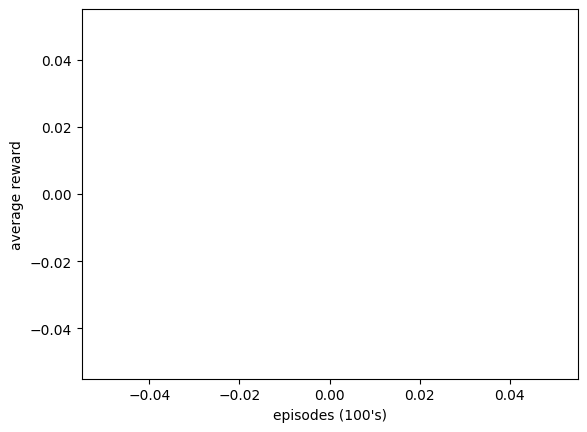

In [51]:
import matplotlib.pyplot as plt

def get_average(values):
    return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
    avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()